# Haberman cancer survival dataset

 The Haberman's cancer survival dataset contains study that was conducted between **1958 to 1970** at the**University of chicago's billings hospital** on the survival of patients who had surgery for Breast Cancer.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
colnames = ['age', 'year', 'nodes', 'status']
haberman = pd.read_csv('haberman.csv',header= None , names= colnames)

In [14]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [15]:
haberman.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [4]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [19]:
haberman.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
year,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


In [6]:
# data points and features
print(haberman.shape)
#columns names
print(haberman.columns)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


# Understanding dataset

1) **Age** - Age of the person when she undergoes the treatment.

2) **Year** - Year of the treatment.

3) **Nodes** - This implies whether the cancer affected the lymph nodes or not. If there are positive nodes it indicates that cancer has been spread to lymph nodes.

4) **Status** - 1 represents patients survived more than 5 years ;
            2 represents patients died within 5 years of treatment.

# Objective

   Explore the dataset and identify the method for predicting whether the patient survived for more than 5 years or not   based on given features.



In [7]:
#data points for each class 
haberman["status"].value_counts()
# 1 represents patients survived more than 5 years ;
#2 represents patients died within 5 years of treatment.

1    225
2     81
Name: status, dtype: int64

#Observation:

1) From the above list it is clear that the data set is quite imbalance.

2) As the no.of data points for "class 1" is 225 and for "class 2" is 81, which differs by 144 data-points .


# 2D-Scatter Plot

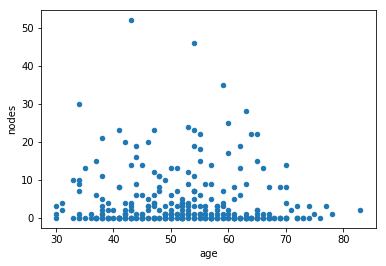

In [8]:
haberman.plot(kind='scatter',x='age',y='nodes')
plt.show()

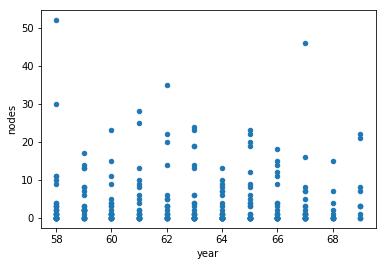

In [17]:
haberman.plot(kind='scatter',x='year',y='nodes')
plt.show()

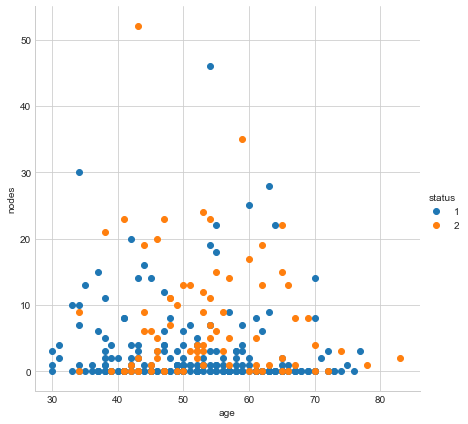

In [25]:
# 2-D Scatter plot with color-coding for each class.
sns.set_style("whitegrid")
s=sns.FacetGrid(haberman,hue="status",size=6)
s=s.map(plt.scatter,"age","nodes")
s=s.add_legend()
plt.show()

**#observation**

1) Patient with **nodes = 0** are likley to survive.

2) Patient with age **more that 40 **and **less than 70** have nodes **greater than 10**.

3) Patient with age between **33-75 years** approx are not likely to survive the operation.


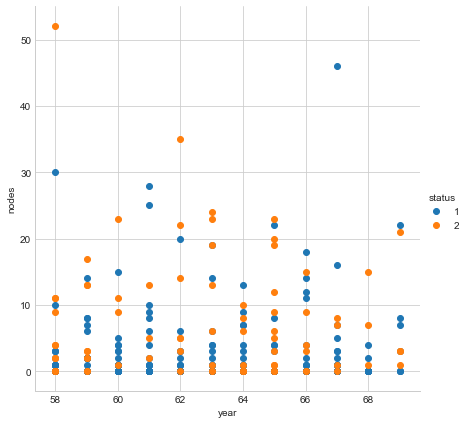

In [23]:
# 2-D Scatter plot with color-coding for each class.
The points are scattered in all the regions and this is very hard to find the separation of status. Lets try to get pair plots with the variables to get more insights.


sns.set_style("whitegrid")
s=sns.FacetGrid(haberman,hue="status",size=6)
s=s.map(plt.scatter,"year","nodes")
s=s.add_legend()
plt.show()

**#Observation**

1) Operations done in the year **1960** and **1961** were more **succesful** than compared any other year.

2) Operations done in the year **1963** and **1965** were more **unsuccesful** than compared to any other year.


**The points are scattered in all the regions and this is very hard to find the separation of status. Lets try to get pair plots with the variables to get more insights.**



# Pair-Plot

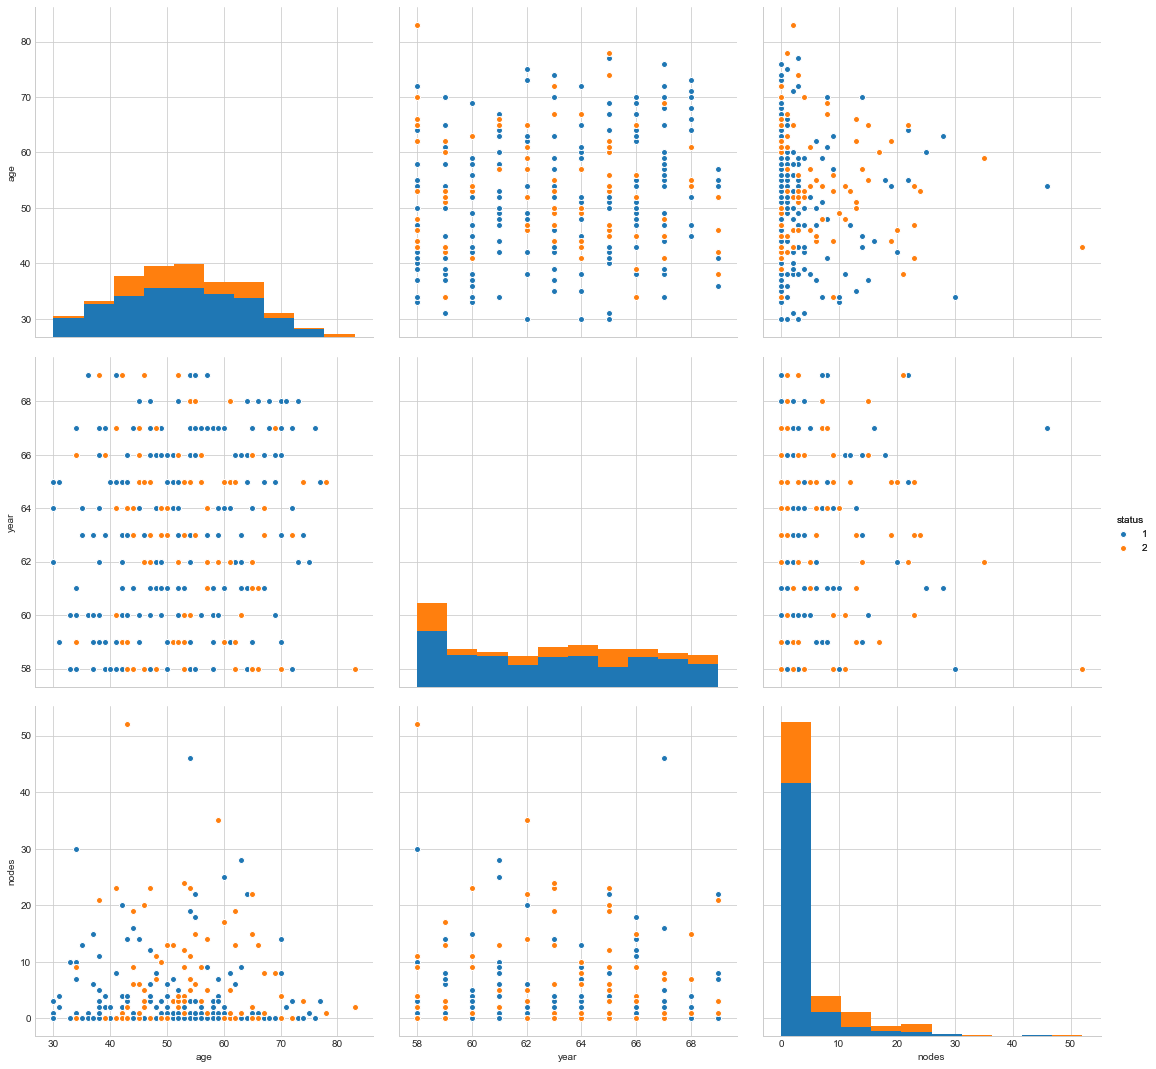

In [33]:
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status", vars=["age","year","nodes"],size=5).add_legend()
plt.show()

**#Observation**

1) From the above pair plots also we didn't find any useful information for bifurcating the statuses based on the provided variables.

2) The year data is not providing any useful information since both the points are scattered across almost all mentioned years.

3) Now lets try to find the **classification** based on **univariate analysis**



# **Univariate analysis-Histogram**

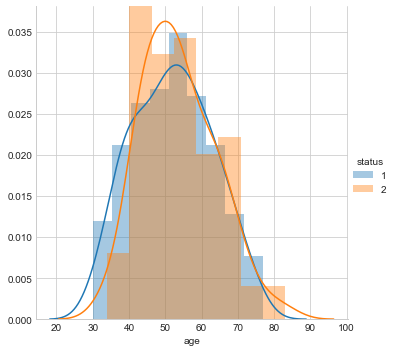

In [38]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

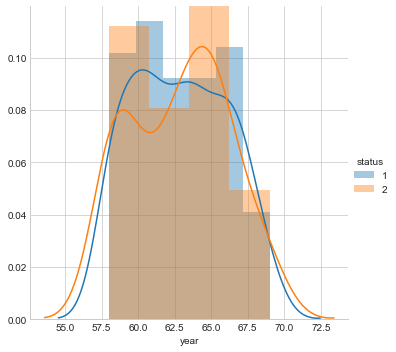

In [37]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

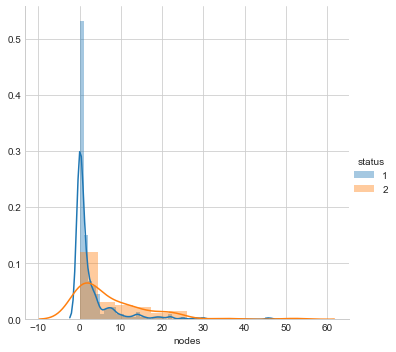

In [36]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

**#Observation**

1) From the plot of age we can say that, patient with the age of **40 or more** have **low chance** of surviving under **5 yrs**.

2) Patients survival chances were **greater** between year of **1958-62**.

3) Patients survival chances were **lesser** between year of **1963-66**.

4) Patients with the **nodes = 0** have **higher** chance of surviving and **nodes > 0** have **lower** chance of surviving.

5) The plots are very **overlapping** in plots of every feature'


# **PDF and CDF**

**Age**


In [40]:
haberman_class1=haberman.loc[haberman['status']==1]
haberman_class2=haberman.loc[haberman['status']==2]

PDF= [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
Bin_edges= [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
CDF= [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


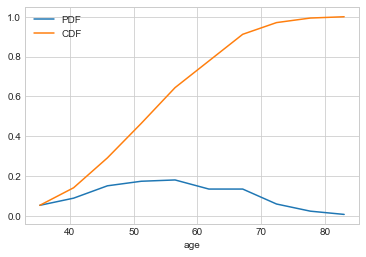

In [56]:
count,bin_edges=np.histogram(haberman['age'],bins=10,density=True)
pdf=count/(sum(count))
print('PDF=',pdf);
print("Bin_edges=",bin_edges)
cdf=np.cumsum(pdf)
print('CDF=',cdf)
plt.xlabel('age')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['PDF','CDF'])
plt.show();

**year**

PDF= [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
Bin_edges= [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
CDF= [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


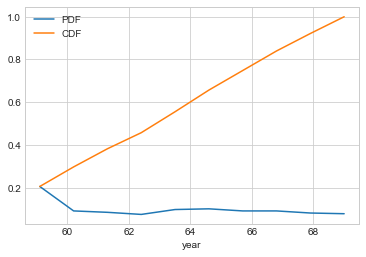

In [55]:
count,bin_edges=np.histogram(haberman['year'],bins=10,density=True)
pdf=count/(sum(count))
print('PDF=',pdf);
print("Bin_edges=",bin_edges)
cdf=np.cumsum(pdf)
print('CDF=',cdf)
plt.xlabel('year')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['PDF','CDF'])
plt.show();

**nodes**

PDF= [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
Bin_edges= [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
CDF= [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


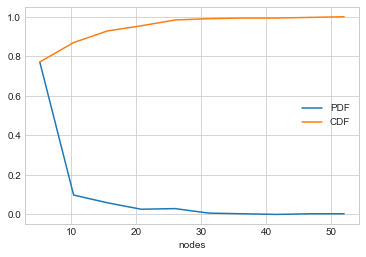

In [54]:
count,bin_edges=np.histogram(haberman['nodes'],bins=10,density=True)
pdf=count/(sum(count))
print("PDF=",pdf);
print("Bin_edges=",bin_edges)
cdf=np.cumsum(pdf)
print('CDF=',cdf)
plt.xlabel('nodes')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['PDF','CDF'])
plt.show();

**#Observation**

1) There is chance of **40%** that patient will **survive** with age **less than 50**.

2) The Patients with nodes **less** than **10** had approx **97%** chance of survivng .


# Box- Plot

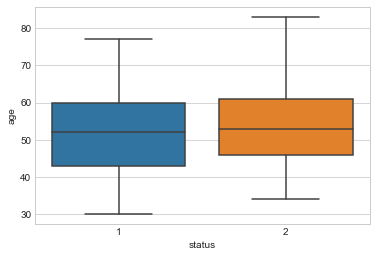

In [57]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
sns.boxplot(x='status',y='age', data=haberman)
plt.xlabel('status')
plt.ylabel('age')
plt.show()


#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
sns.boxplot(x='status',y='year', data=haberman)
plt.xlabel('status')
plt.ylabel('year')
plt.show()


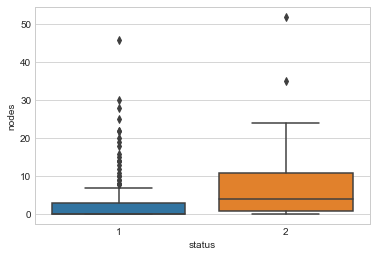

In [59]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
sns.boxplot(x='status',y='nodes', data=haberman)
plt.xlabel('status')
plt.ylabel('nodes')
plt.show()


**#Observation**

1) Many patients who **survived** had **0 or no** nodes at all.

2) Patients with the age **less than 35** were surely able to **survive**.

3) Patient with nodes between**1 and 25** are likely to **unsurvive**.


# Viloin-Plot

**Age**

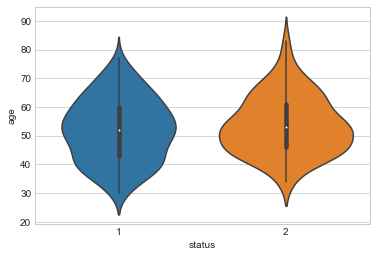

In [60]:
# A violin plot combines the benefits of the previous two plots and simplifies them.

sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.xlabel('status')
plt.ylabel('age')
plt.show()

**Year**


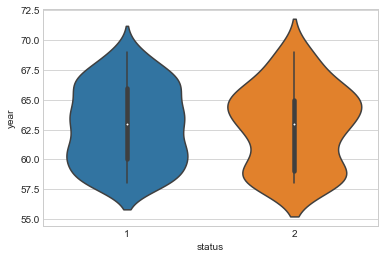

In [62]:
sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.xlabel('status')
plt.ylabel('year')
plt.show()

**nodes**

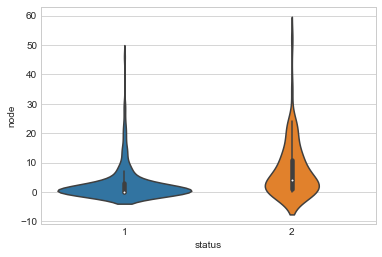

In [63]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.xlabel('status')
plt.ylabel('node')
plt.show()

**#Observation**

1) By looking at nodes, we can say that **50%** of patient who survived had **0 or no nodes**. 

3) There is high over lapping so it is not possible to set the limits to classify the 2 classes based on any features.

# Conclusion

1) The dataset is **imbalance** with higher survived patients details.

2) Based on the data exploration the patients with **0 or very less number nodes had a higher chance of survival**.

3) Number of nodes field is better than other fields for classification.

4) Any age does not affect on the survival.

5) Years also scattered across all intervals for both status.

